In [236]:
#Подгружаем необходимые библиотеки
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image
print("Setup Complete")

Setup Complete


Context

In [237]:
#Изучаем данные пассажиров Титаника

In [238]:
#Проверяем загрузку датасета
train_filepath = "./tabular-playground-series-apr-2021/train.csv"
train_data=pd.read_csv(train_filepath)
train_data=train_data.set_index("PassengerId")
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [239]:
#Отображаем типы данных в датасете
train_data_dict=pd.DataFrame(train_data.dtypes)
train_data_dict

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [240]:
#Подсчитываем уникальные значения и пропуски
train_data_dict["Lost"]=train_data.isnull().sum()
train_data_dict["Non-unique"]=train_data.nunique()
train_data_dict["Count"]=train_data.count()
train_data_dict

,0,Lost,Non-unique,Count
Survived,int64,0,2,100000
Pclass,int64,0,3,100000
Name,object,0,92144,100000
Sex,object,0,2,100000
Age,float64,3292,173,96708
SibSp,int64,0,7,100000
Parch,int64,0,8,100000
Ticket,object,4623,75331,95377
Fare,float64,134,15935,99866
Cabin,object,67866,26992,32134


Data quality assessment

In [241]:
#т.к. в именах есть повторы, попробуем удалить дубликаты, используя связку "пол" + "имя"
train_data_copy=train_data.copy()
train_data_copy.drop_duplicates(subset=["Name","Sex"])
train_data_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [242]:
#Преобразовываем датасет, заполняем пропущенные значения
#Создаем копию массива
#Работаем со значениями: Age,Ticket,Fare,Cabin, Embarked
train_data_copy.groupby("Pclass").mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.579779,44.774464,0.466337,0.517170,92.653113
2,0.525018,38.631237,0.382161,0.438335,25.756003
3,0.247305,33.407362,0.357801,0.419622,20.618226


In [243]:
train_data_copy.groupby("Sex").mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.711525,1.918767,40.044890,0.427562,0.548740,55.225372
male,0.205795,2.254054,37.030884,0.374327,0.380903,35.094919


In [244]:
train_data_copy_embarked=train_data_copy.groupby("Embarked").Embarked.value_counts()
train_data_copy_embarked

Embarked  Embarked
C         C           22187
Q         Q            5424
S         S           72139
Name: Embarked, dtype: int64

In [245]:
train_pclass=train_data_copy.groupby(["Pclass"])
train_data_copy["Fare"]=train_pclass.Fare.apply(lambda x:x.fillna(x.mean()))

In [246]:
train_sex=train_data_copy.groupby(["Sex"])
train_data_copy["Age"]=train_sex.Age.apply(lambda x:x.fillna(x.mean()))

In [247]:
values={"Embarked":"S","Ticket":0,"Cabin":0,}
train_data_copy_fill=train_data_copy.fillna(value=values)
train_data_copy_fill

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,37.030884,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,37.030884,0,0,27323,13.35,0,S
2,0,3,"Owens, Kenneth",male,0.330000,1,2,CA 457703,71.29,0,S
3,0,3,"Kramer, James",male,19.000000,0,0,A. 10866,13.04,0,S
4,1,3,"Bond, Michael",male,25.000000,0,0,427635,7.76,0,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.000000,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.000000,0,0,13273,11.15,0,S
99997,0,3,"Childress, Charles",male,37.000000,0,0,0,9.95,0,S


In [248]:
train_data_copy_fill.dropna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,37.030884,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,37.030884,0,0,27323,13.35,0,S
2,0,3,"Owens, Kenneth",male,0.330000,1,2,CA 457703,71.29,0,S
3,0,3,"Kramer, James",male,19.000000,0,0,A. 10866,13.04,0,S
4,1,3,"Bond, Michael",male,25.000000,0,0,427635,7.76,0,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.000000,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.000000,0,0,13273,11.15,0,S
99997,0,3,"Childress, Charles",male,37.000000,0,0,0,9.95,0,S


In [249]:
#группируем пассажиров по возрасту
def agegroup(age):
    if age<=1:
        return "0+"
    if 1<age<=5:
        return "1-5"
    if 5<age<=12:
        return "5-12"
    if 12<age<=18:
        return "12-18"
    if 18<age<=25:
        return "18-25"
    if 25<age<=40:
        return "25-40"
    if 40<age<=50:
        return "40-50"
    elif 50<age<=65:
        return "50-65"
    else:
        return "65+"
train_data_copy_fill["AgeGroup"]=train_data_copy_fill["Age"].map(agegroup)
train_data_copy_fill.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,37.030884,2,0,209245,27.14,C12239,S,25-40
1,0,3,"Bryan, Drew",male,37.030884,0,0,27323,13.35,0,S,25-40
2,0,3,"Owens, Kenneth",male,0.330000,1,2,CA 457703,71.29,0,S,0+
3,0,3,"Kramer, James",male,19.000000,0,0,A. 10866,13.04,0,S,18-25
4,1,3,"Bond, Michael",male,25.000000,0,0,427635,7.76,0,S,18-25


Data exploration

In [250]:
#выводим статистику по погибшим
train_data_copy_fill.Survived.value_counts(normalize=True)

0    0.57226
1    0.42774
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

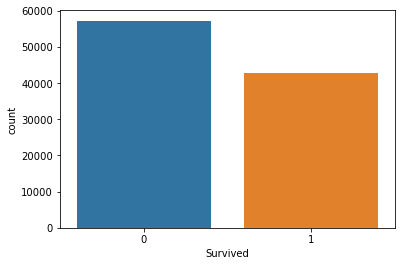

In [251]:
#статистика в виде графика
sns.countplot(data=train_data_copy_fill,x='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

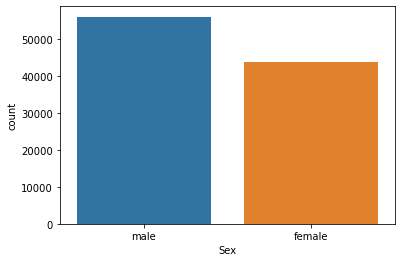

In [252]:
#выводим статистику по полу
sns.countplot(x='Sex',data=train_data_copy_fill)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

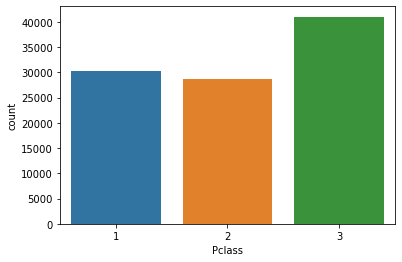

In [253]:
#выводим статистику по классу обслуживания
sns.countplot(x='Pclass',data=train_data_copy_fill)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

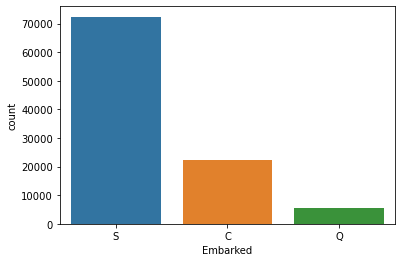

In [254]:
#выводим статистику по месту посадки на корабль
sns.countplot(x='Embarked',data=train_data_copy_fill)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

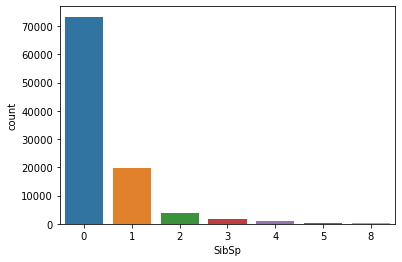

In [255]:
#выводим статистику по количеству детей у родителей
sns.countplot(x='SibSp',data=train_data_copy_fill)

<AxesSubplot:xlabel='Parch', ylabel='count'>

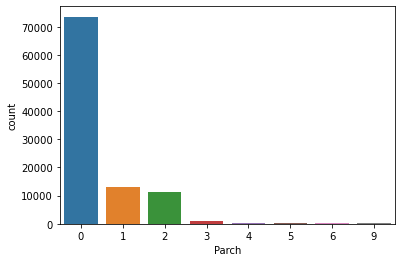

In [256]:
#выводим статистику по родственникам
sns.countplot(x='Parch',data=train_data_copy_fill)

C:\Users\SZO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

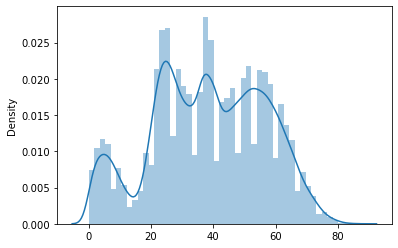

In [257]:
#выводим распределение пассажиров по возрасту
sns.distplot(x=train_data_copy_fill['Age'],kde=True)

C:\Users\SZO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


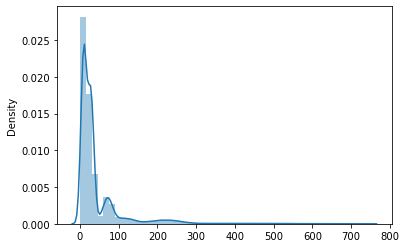

In [258]:
#выводим распределение стоимости билетов 
a=sns.distplot(x=train_data_copy_fill['Fare'], kde=True)

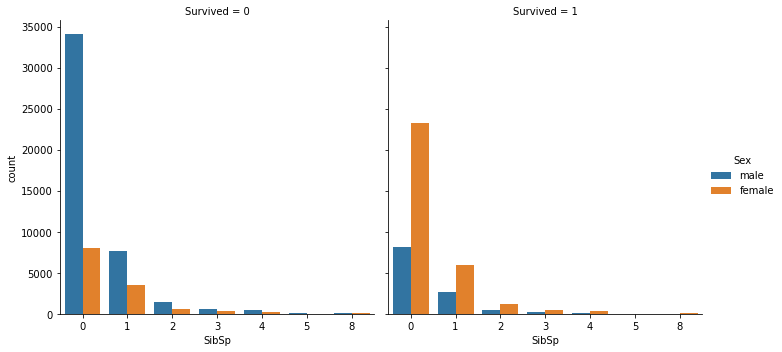

In [259]:
#выводим распределение выживаемости в зависимости от количества детей
g=sns.catplot(x="SibSp", hue="Sex",col="Survived",data=train_data_copy_fill, kind="count")

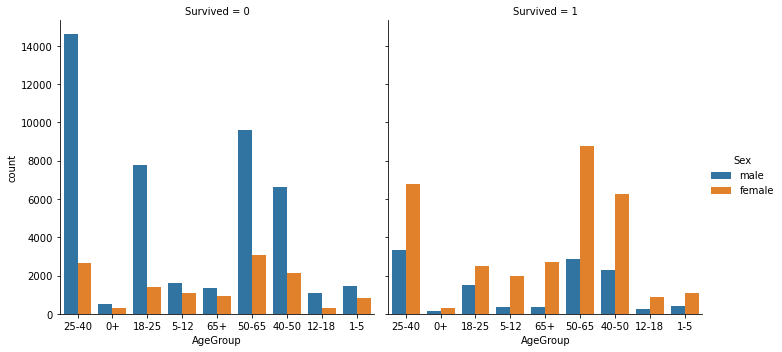

In [260]:
#выводим распределение выживаемости в зависимости от возраста и пола
g=sns.catplot(x="AgeGroup", hue="Sex",col="Survived",data=train_data_copy_fill, kind="count")

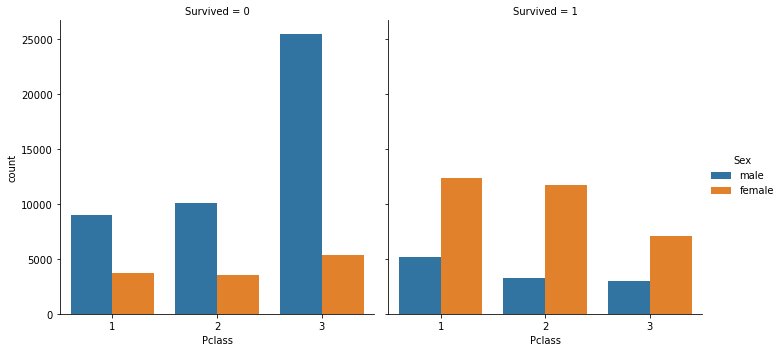

In [261]:
#выводим распределение выживаемости в зависимости от класса каюты и пола
g=sns.catplot(x="Pclass", hue="Sex",col="Survived",data=train_data_copy_fill, kind="count")

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

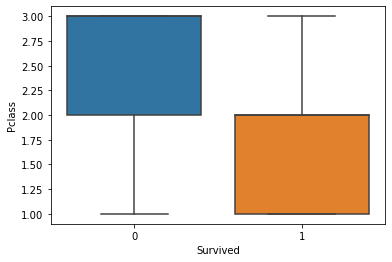

In [262]:
sns.boxplot(x="Survived", y="Pclass", data=train_data_copy_fill)

Summary

In [263]:
#1) Общая статистика: 57% - умерло; 43% - выжило.
#2) Люди, имеющие мало родственников (1) или без родственникам (0), выжили в большей степени, чем другие.
#3) Выживаемость людей среднего и старшего возраста (25-65) выше, чем у детей и молодых людей.
#4) Чем выше класс каюты, тем больше доля выживших. В большинстве случаев выживали пассажиры 1 и 2 класса.
#5) Статистика выживаемости женщин лучше, чем у мужчин 